**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'

/home/dhiman/Miniconda2/envs/westpa-2017.10/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.
Reanalyzing file assign.h5 for scheme TEST.
Reanalyzing file direct.h5 for scheme TEST.
Reanalyzing file reweight.h5 for scheme TEST.

Complete!
Setting iteration to iter 800.


In [2]:
#========================================================
#CALCULATING MILESTONE LIFETIME
#========================================================
total_iteration = 800

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink1 = 0.0

it_back = [0.0 for i in range(total_iteration)]
flux_back = 0.0
flux_back_array = []
sink2 = -2.0

lifetime = 0.0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 21
    
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink1 and l[j][tau-1] >= sink1:
            it[i] += wts[j]
            for k in range(tau):
                if l[j][k] < sink1 and l[j][k+1] >= sink1:
                    flux += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
                    
        if l[j][0] > sink2 and l[j][tau-1] <= sink2:
            it_back[i] += wts[j]
            for k in range(tau):
                if l[j][k] > sink2 and l[j][k+1] <= sink2:
                    flux_back += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
    flux_array.append(flux)
    flux_back_array.append(flux_back)

print "MFPT = ", 1./flux     
print "MFPT_back = ", 1./flux_back
print "lifetime = ", lifetime/(sum(it)+sum(it_back))
print "forward probability = ", sum(it)
print "backward probability = ", sum(it_back)

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability"
print >>f1, 1./flux, 1./flux_back, lifetime/(sum(it)+sum(it_back)), sum(it), sum(it_back)
f1.close()

Setting iteration to iter 1.
Setting iteration to iter 2.
Setting iteration to iter 3.
Setting iteration to iter 4.
Setting iteration to iter 5.
Setting iteration to iter 6.
Setting iteration to iter 7.
Setting iteration to iter 8.
Setting iteration to iter 9.
Setting iteration to iter 10.
Setting iteration to iter 11.
Setting iteration to iter 12.
Setting iteration to iter 13.
Setting iteration to iter 14.
Setting iteration to iter 15.
Setting iteration to iter 16.
Setting iteration to iter 17.
Setting iteration to iter 18.
Setting iteration to iter 19.
Setting iteration to iter 20.
Setting iteration to iter 21.
Setting iteration to iter 22.
Setting iteration to iter 23.
Setting iteration to iter 24.
Setting iteration to iter 25.
Setting iteration to iter 26.
Setting iteration to iter 27.
Setting iteration to iter 28.
Setting iteration to iter 29.
Setting iteration to iter 30.
Setting iteration to iter 31.
Setting iteration to iter 32.
Setting iteration to iter 33.
Setting iteration t

Setting iteration to iter 269.
Setting iteration to iter 270.
Setting iteration to iter 271.
Setting iteration to iter 272.
Setting iteration to iter 273.
Setting iteration to iter 274.
Setting iteration to iter 275.
Setting iteration to iter 276.
Setting iteration to iter 277.
Setting iteration to iter 278.
Setting iteration to iter 279.
Setting iteration to iter 280.
Setting iteration to iter 281.
Setting iteration to iter 282.
Setting iteration to iter 283.
Setting iteration to iter 284.
Setting iteration to iter 285.
Setting iteration to iter 286.
Setting iteration to iter 287.
Setting iteration to iter 288.
Setting iteration to iter 289.
Setting iteration to iter 290.
Setting iteration to iter 291.
Setting iteration to iter 292.
Setting iteration to iter 293.
Setting iteration to iter 294.
Setting iteration to iter 295.
Setting iteration to iter 296.
Setting iteration to iter 297.
Setting iteration to iter 298.
Setting iteration to iter 299.
Setting iteration to iter 300.
Setting 

Setting iteration to iter 535.
Setting iteration to iter 536.
Setting iteration to iter 537.
Setting iteration to iter 538.
Setting iteration to iter 539.
Setting iteration to iter 540.
Setting iteration to iter 541.
Setting iteration to iter 542.
Setting iteration to iter 543.
Setting iteration to iter 544.
Setting iteration to iter 545.
Setting iteration to iter 546.
Setting iteration to iter 547.
Setting iteration to iter 548.
Setting iteration to iter 549.
Setting iteration to iter 550.
Setting iteration to iter 551.
Setting iteration to iter 552.
Setting iteration to iter 553.
Setting iteration to iter 554.
Setting iteration to iter 555.
Setting iteration to iter 556.
Setting iteration to iter 557.
Setting iteration to iter 558.
Setting iteration to iter 559.
Setting iteration to iter 560.
Setting iteration to iter 561.
Setting iteration to iter 562.
Setting iteration to iter 563.
Setting iteration to iter 564.
Setting iteration to iter 565.
Setting iteration to iter 566.
Setting 

MFPT =  1064.6521427004836
MFPT_back =  10574.485296938723
lifetime =  2274.4019787420248
forward probability =  0.9027095946556081
backward probability =  0.09670857865536865


Setting iteration to iter 1000.


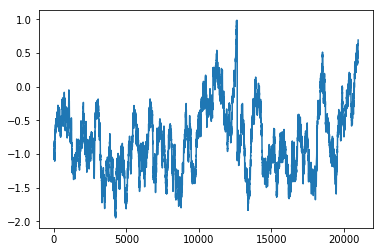

In [4]:
#LOOKING AT A TRAJECTORY
w.iteration = 1000
final_trajectories = w.current.seg_id
traj_trace = w.trace(final_trajectories[599])
#print('What data can we access from our trace for segment {}?'.format(final_trajectories[45]))
#print(traj_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(traj_trace['pcoord'])
plt.show()
#plt.plot(np.log10(traj_trace['weights']))
#plt.show()
#trajectory = traj_trace['pcoord']
#print trajectory

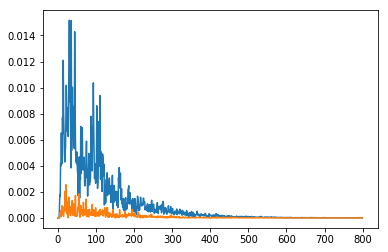

In [3]:
#Forward and backward first passage time distributions
plt.plot(it)
plt.plot(it_back)

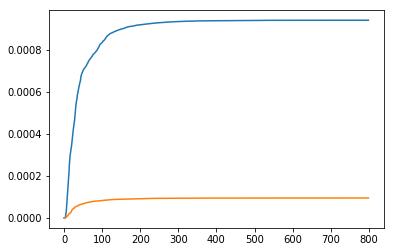

In [4]:
#check for convergence
plt.plot(flux_array)
plt.plot(flux_back_array)

In [5]:
print it
f1 = open('FPTD_forward.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()


f2 = open('FPTD_back.dat','w')

for i in range(len(it)):
    print >>f2, i*tau, it_back[i]
    
f2.close()

[0.0, 0.0, 0.0, 0.0, 0.0007364898989898988, 0.0017858856421356418, 0.0016490079365079366, 0.0041816829004329, 0.0039928984788359795, 0.00652175925925926, 0.004146756253006252, 0.0060422556417348075, 0.007707595298220299, 0.006460181677890015, 0.012094099777537276, 0.008003417107583776, 0.006593894216637273, 0.004946036522633745, 0.004290924456202235, 0.004959558945105821, 0.0054042769724916735, 0.00809550215559475, 0.010171056740082864, 0.008265409532382912, 0.006647299612360376, 0.00724563721707819, 0.008428524012485653, 0.006256088170007372, 0.008445226105617145, 0.012986602566009257, 0.015165492500326604, 0.012270568739327001, 0.008879728134600534, 0.008953143156094872, 0.0038366132810506194, 0.015146929701486756, 0.005168937418974031, 0.006987984136149649, 0.01002705115790821, 0.00714026592334936, 0.008557623960297878, 0.005987592808032443, 0.0064034984313086525, 0.005323906565674847, 0.014280203759224577, 0.009117267411185521, 0.005958599118949861, 0.0043156457614711005, 0.0047909